# Development over time barchart

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
import datetime as dt
import warnings
from random import sample 
warnings.filterwarnings('ignore')
from conv import convolved

import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
pip install conv

  Created wheel for conv: filename=conv-0.2-cp37-none-any.whl size=5259 sha256=af9b1cce109980f7c8178f5ba722a6a3c4d74801d07efb5da35fd8ce059c5211
  Stored in directory: /Users/theisgregersen/Library/Caches/pip/wheels/bf/6e/eb/a2640d44699958e7f5f0ec1e54913cd40903bdda913b32b007
Successfully built conv
Note: you may need to restart the kernel to use updated packages.


In [4]:
df_covid = pd.read_csv("covid_de.csv")
df_demo = pd.read_csv("demographics_de.csv")
df_des = pd.read_excel("location.xlsx")

#drop NaN and change to datetime
df_covid = df_covid.dropna()
df_covid['date'] = pd.to_datetime(df_covid.date)


#Changing gender in demografic to have same values as covid data set. 
df_demo['gender'] = df_demo['gender'].map({'female': 'F','male':'M'})


#Merging the two dataset on state, age_group and gender. 
merged = pd.merge(df_covid,df_demo,how='inner', on=["state","age_group","gender"])
#And merging latitude and longtitude on the full dataset
df = pd.merge(merged,df_des,how='inner',on=['county'])

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [6]:
df_state=df[['state','date','cases']]
# df_state['date'] = pd.to_datetime(df_state.date)
df_state_date=pd.DataFrame(df_state.groupby(['state','date'],as_index=False).count().sort_values(by='cases',ascending=False))

df_state=pd.DataFrame(df_state.groupby('state',as_index=False).count().sort_values(by='cases',ascending=False))
pd.set_option('display.max_rows', df.shape[0]+1)


In [7]:
users = df_state_date['state'].unique()
dates = pd.date_range(df_state_date.date.min(), df_state_date.date.max())
idx = pd.MultiIndex.from_product((dates, users), names=['date', 'state'])
df_state_date=df_state_date.set_index(['date', 'state']).reindex(idx, fill_value=0).reset_index()

In [8]:
#Her beregnes cumsum, som bør være rigtigt men ender med at være forkert i plottet senere... 
df_state_date=pd.DataFrame(df_state_date.groupby(['state','date']).sum().groupby('state').cumsum().reset_index())

df_state_date.groupby(pd.Grouper(key="date", freq='D'))


In [9]:
#Create 16 of different colors
c=['dimgray',
 'mediumaquamarine',
 'pink',
 'purple',
 'seagreen',
 'gray',
 'lightgray',
 'papayawhip',
 'red',
 'slateblue',
 'midnightblue',
 'darkslategrey',
 'sandybrown',
 'black',
 'orange',
 'peachpuff']

In [10]:
#Creating a color dictionary to make sure color stick to state
colors = dict(zip(
    users,
    c
))
group_lk = df_state_date.set_index('state').to_dict()

Now we need to polish the plot and make a function

In [11]:
# fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(date):
    dff = df_state_date[df_state_date['date'].eq(date)].sort_values(by='cases', ascending=True).tail(16)
    ax.clear()
    ax.barh(dff['state'], dff['cases'],color=[colors[x] for x in dff['state']])

    dx = dff['cases'].max() / 200
    for i, (cases, state) in enumerate(zip(dff['cases'], dff['state'])):
#         ax.text(cases-dx, i,     state,           size=14, weight=600, ha='right', va='bottom')
        ax.text(cases+dx, i,     f'{cases:,.0f}',  size=14, ha='left',  va='center')
        # ... polished styles
        ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=40, ha='right', weight=800)
        ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777')
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_ticks_position('top')
        ax.tick_params(axis='x', colors='#777777', labelsize=12)
#         ax.set_yticks([])
        ax.margins(0, 0.01)
        ax.grid(which='major', axis='x', linestyle='-')
        ax.set_axisbelow(True)
        ax.text(0, 1.12, 'The number of cases in states',
                transform=ax.transAxes, size=24, weight=600, ha='left')
        ax.text(1, 0, 'by @Katja, Theis, Victor', transform=ax.transAxes, ha='right',
                color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
#         plt.box(False)
    
# draw_barchart('2020-03-29')

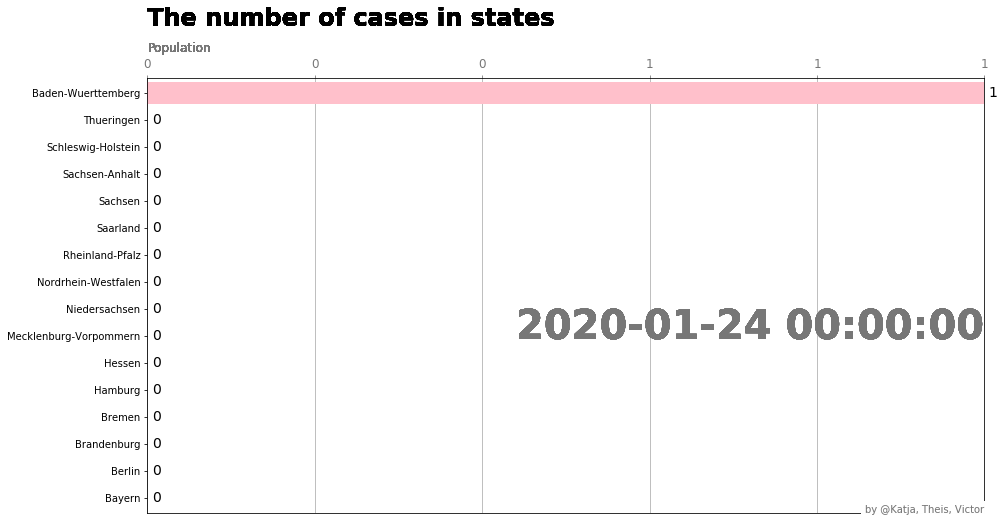

In [21]:

import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=pd.date_range(start='2020-01-24',end='2020-04-26'))
HTML(animator.to_jshtml()) 
#animator.to_html5_video() 
#or 
#animator.save()